In [2]:
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [3]:
class Event:
        """ Simulated ATPC event class"""
        def __init__(self,id, label):
            
            self.x = []
            self.y = []
            self.z = []
            self.q = []
            self.id = id
            self.label = label
            
        def summary(self):
            
            print("x: ",self.x)
            print("y: ",self.y)
            print("z: ",self.z)
            print("q: ",self.q)
            print("id: ",self.id)
            print("label", self.label)
            


In [4]:
def load_sim_data(filename):
    
    datasets = []
    
    with h5py.File(filename,'r') as h5:
                
        for key in h5.keys():
            
            # Getting event label
            # even = reaction, odd = beam
            id    = int(key[key.find('[')+1:key.find(']')])
            label = 0 if id % 2 == 0 else 1
            
            e = Event(id, label)
            
            for x,y,z,t,A in zip(h5[key]['x'],h5[key]['y'],h5[key]['z'],h5[key]['t'],h5[key]['A']):
                
                e.x.append(x)
                e.y.append(y)
                e.z.append(z)
                e.q.append(A)
            
            # Do not load empty events
            if( len(e.x) == 0 or len(e.y) == 0 or len(e.z) == 0 ) : continue
            
            datasets.append(e)
            
    datasets.sort(key=lambda e: e.id, reverse=False)
    return datasets

In [5]:
def plot_event(df,id):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('x [mm]')
    ax.set_ylabel('y [mm]')
    ax.set_zlabel('z [mm]')
    ax.set_title('Event #'+str(df[id].id), fontsize=15)
    ax.scatter3D(df[id].x,df[id].y,df[id].z, marker='o')

In [6]:
def plot_2D(df,id):
    
    fig  = plt.figure(figsize=(7, 7))
    plt.xlabel('x [mm]')
    plt.ylabel('y [mm]')
    plt.title('Event #'+str(df[id].id), fontsize=15)
    plt.scatter(df[id].x, df[id].y, marker='o')
    

In [8]:
df = load_sim_data('DataFiles/Mg22_alphaalpha_digiSim.h5')

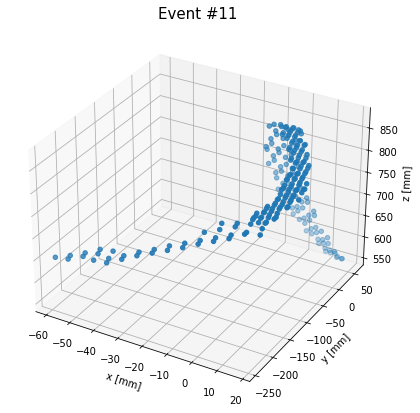

In [15]:
plot_event(df,11)